In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime

%matplotlib inline

### Assumptions

In [24]:
km_per_year = 15000

### Depreciation functions

In [180]:
def depreciation_rate_for_age(age_in_years):
    'Go with the simple assumption of 15% for first 3 years, and 10% after that'
    if age_in_years < 3:
        return 0.15
    else:
        return 0.10

### Read the tabular data:

In [294]:
data = pd.read_excel(
    'car_data.xlsx',
    usecols=5,  # Skip experimental column values for now
)

In [295]:
data

,make,model,variant,year,purchase_price,fuel_consumption
0,Mazda,Mazda3,Sedan 2.5L,2018,30000,5.8
1,Mazda,Mazda3,Hatch 2.0L,2018,30000,6.1
2,Honda,Civic,Sedan VTi-L,2017,25000,6.0
3,Honda,Civic,Hatch VTi-L,2017,22000,6.0
4,Honda,HR-V,VTi-S,2017,24000,6.9


### Calculate Depreciation

In [296]:
purchase_price = 25000
year_of_purchase = datetime.now().year
age_at_purchase = year_of_purchase - 2017
num_years = 10

In [297]:
values = np.zeros(num_years)
values[0] = purchase_price
previous = values[0]
for i in range(1, num_years):
    previous *= (1.0 - depreciation_rate_for_age(age_at_purchase + i))
    values[i] = previous

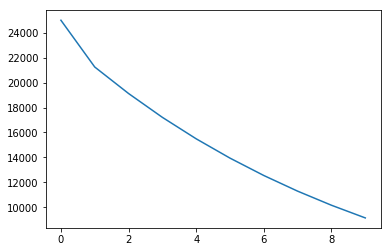

In [298]:
plt.plot(values);

In [299]:
depreciated = '{0}yr_value'.format(num_years)
data[depreciated] = data.purchase_price

In [300]:
for i in range(1, num_years):
    data[depreciated] *= (1.0 - depreciation_rate_for_age(age_at_purchase + i))

In [301]:
data['depreciation_cost'] = data.purchase_price - data[depreciated]

In [307]:
data

,make,model,variant,year,purchase_price,fuel_consumption,10yr_value,depreciation_cost
0,Mazda,Mazda3,Sedan 2.5L,2018,30000,5.8,10976.913855,19023.086145
1,Mazda,Mazda3,Hatch 2.0L,2018,30000,6.1,10976.913855,19023.086145
2,Honda,Civic,Sedan VTi-L,2017,25000,6.0,9147.428213,15852.571787
3,Honda,Civic,Hatch VTi-L,2017,22000,6.0,8049.736827,13950.263173
4,Honda,HR-V,VTi-S,2017,24000,6.9,8781.531084,15218.468916
